In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
sys.path.append(os.path.join('..','addDependencies','UTILS'))
from cosamp_fn import cosamp
# cosamp function is available at https://github.com/avirmaux/CoSaMP

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

In [18]:
## Generate signal, DCT of signal

n = 4096 # points in high resolution signal
f_orig = 200
t = np.linspace(0,10,n)
x = np.cos(2 * 200 * np.pi * t)


xt = np.fft.fft(x) # Fourier transformed signal
PSD = xt * np.conj(xt) / n # Power spectral density

In [19]:
400/2**np.arange(5)

array([400., 200., 100.,  50.,  25.])

In [31]:
dct(np.identity(10)[0])

array([2.        , 1.97537668, 1.90211303, 1.78201305, 1.61803399,
       1.41421356, 1.1755705 , 0.907981  , 0.61803399, 0.31286893])

In [30]:
dct?

Signature: dct(x, type=2, n=None, axis=-1, norm=None, overwrite_x=False)
Docstring:
Return the Discrete Cosine Transform of arbitrary type sequence x.

Parameters
----------
x : array_like
    The input array.
type : {1, 2, 3, 4}, optional
    Type of the DCT (see Notes). Default type is 2.
n : int, optional
    Length of the transform.  If ``n < x.shape[axis]``, `x` is
    truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
    default results in ``n = x.shape[axis]``.
axis : int, optional
    Axis along which the dct is computed; the default is over the
    last axis (i.e., ``axis=-1``).
norm : {None, 'ortho'}, optional
    Normalization mode (see Notes). Default is None.
overwrite_x : bool, optional
    If True, the contents of `x` can be destroyed; the default is False.

Returns
-------
y : ndarray of real
    The transformed input array.

See Also
--------
idct : Inverse DCT

Notes
-----
For a single dimension array ``x``, ``dct(x, norm='ortho')`` is equal to
MATLAB ``dc

In [20]:
## Randomly sample signal
p_array = 400/2**np.arange(5)
p = 400 # num. random samples, p = n/32
perm = np.floor(np.random.rand(p) * n).astype(int)
y = x[perm]

In [24]:
Psi.shape

(4096, 4096)

In [28]:
Theta.shape

(400, 4096)

In [21]:
## Solve compressed sensing problem
Psi = dct(np.identity(n)) # Build Psi
Theta = Psi[perm,:]       # Measure rows of Psi

s = cosamp(Theta,y,10,epsilon=1.e-10,max_iter=10) # CS via matching pursuit
xrecon = idct(s) # reconstruct full signal

Iteration 6

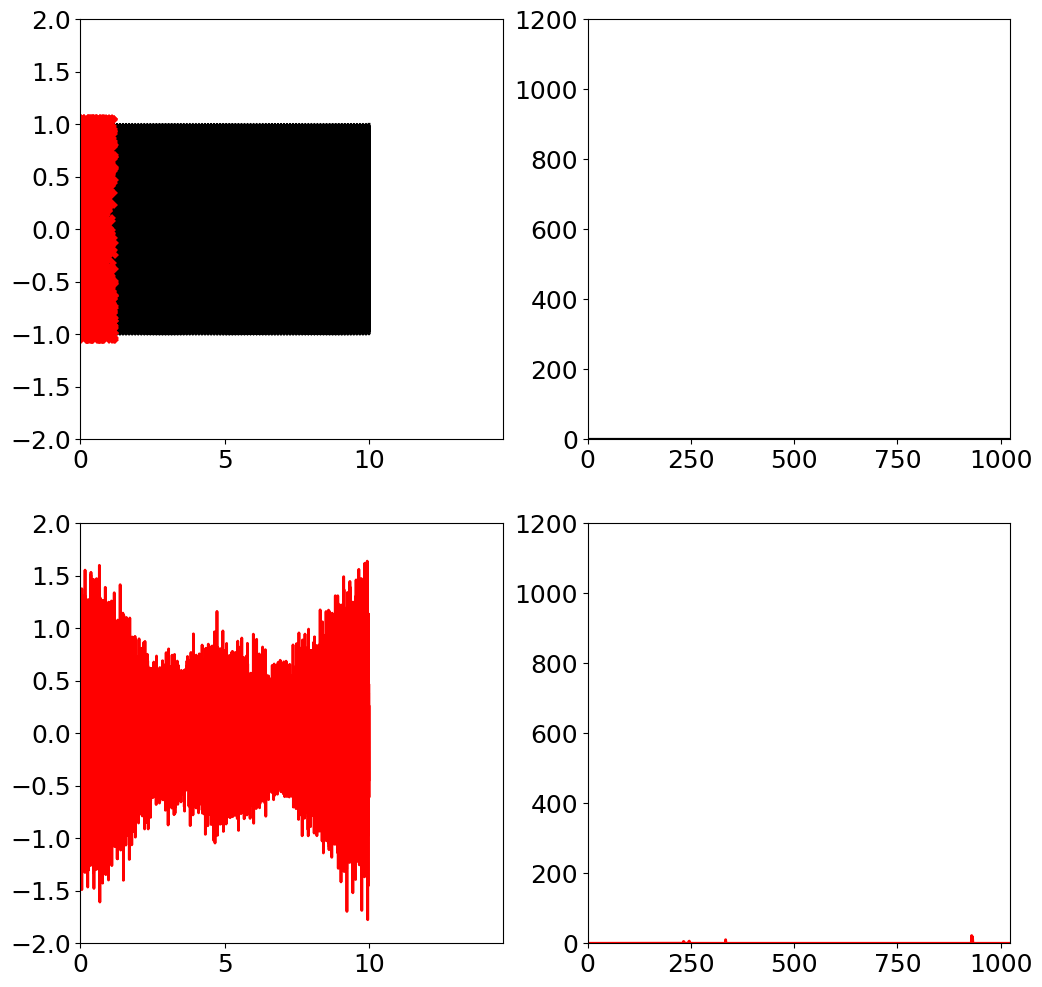

In [22]:
## Plot
time_window = np.array([0,60000])/n
freq = np.arange(n)
L = int(np.floor(n/2))


fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[1].plot(freq[:L],PSD[:L],color='k',linewidth=2)
axs[1].set_xlim(0, 1024)
axs[1].set_ylim(0, 1200)

axs[0].plot(t,x,color='k',linewidth=2)
axs[0].plot(perm/n,y,color='r',marker='x',linewidth=0,ms=12,mew=4)
axs[0].set_xlim(time_window[0],time_window[1])
axs[0].set_ylim(-2, 2)

axs[2].plot(t,xrecon,color='r',linewidth=2)
axs[2].set_xlim(time_window[0],time_window[1])
axs[2].set_ylim(-2, 2)

xtrecon = np.fft.fft(xrecon,n) # computes the (fast) discrete fourier transform
PSDrecon = xtrecon * np.conj(xtrecon)/n # Power spectrum (how much power in each freq)

axs[3].plot(freq[:L],PSDrecon[:L],color='r',linewidth=2)
axs[3].set_xlim(0, 1024)
axs[3].set_ylim(0, 1200)

plt.show()

In [ ]:
## L1-Minimization using SciPy
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y 
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s = res.x

In [ ]:
Theta.shape

In [ ]:
y.shape

In [ ]:
##Getting Accuracy 
meanL2error = np.sqrt(sum((x-xrecon)**2)/Theta.shape[1])
meanL1error = sum(abs(x-xrecon))/Theta.shape[1]

In [ ]:
meanL1error